In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb
import scipy as scp
import pandas as pd

In [3]:
# all energies in cm-1

ionization_Sr88 = 45932.2  
kwargs = {'fontname':'sans-serif'}
width_of_level = 0.25  # width of each level along X-axis
sizefont=7
def gen_level_coordinates(N1,N2,qdef,loc):  # N1,N2 are quantum numbers, qdef = q.defect, loc = location on x-axis
    #define three arrays
    qnum = np.array(range(N1,N2))
    #print(qnum)
    y = np.array(ionization_Sr88-109736.627/(qnum-qdef)**2)
    #print(y)
    N=N2-N1
    x1 = np.array([loc-width_of_level]*N)
    x2 = np.array([loc+width_of_level]*N)
    table = np.array([qnum,y,x1,x2])
    table = table.T
    #print(table)
    lev_coor_dataframe=pd.DataFrame(table)
    lev_coor_dataframe.columns=['qnum','y','x1','x2']
    return lev_coor_dataframe
def custom_levels():
    custom_df=pd.DataFrame([])
    custom_df = pd.read_csv("20190406_levels.csv")  ## reads the file and plots hlines
    #print(custom_df)
    for i in range(0,len(custom_df['y'])):
        plt.hlines(custom_df['y_adjusted'][i],custom_df['loc'][i]-width_of_level,custom_df['loc'][i]+width_of_level,\
                  lw=0.8,color=np.str(custom_df['color'][i]))
        if custom_df['y'][i]!='None':
            plt.text(custom_df['loc'][i]-0.25,custom_df['y_adjusted'][i]-1250,\
                     np.str(custom_df['y'][i]),fontsize=sizefont,\
                     horizontalalignment = 'left',**kwargs)
        if custom_df['label'][i]!='None':
            plt.text(custom_df['loc'][i]-width_of_level,custom_df['y_adjusted'][i]+300,\
                     custom_df['label'][i],usetex='true',fontsize=sizefont,\
                     **kwargs)
    return 
#print(x)
def plot_levels(df,color):
    plt.figure(1)
    #plt.title(r'${}^{88}$Sr states',**kwargs)
    #print(len(df['qnum']))
    for i in range(0,len(df['qnum'])):
        plt.hlines(df['y'][i],df['x1'][i],df['x2'][i],\
                  lw=0.8,color=color)
    plt.ylabel('Term energy [$10^3$ cm-1]',fontsize=sizefont,**kwargs)
    #plt.xlabel('States',**kwargs)
    return
def transitions():
    arrow_df = pd.read_csv('arrows_transitions.csv')  ## Can modify this file for changing the arrows
    #print(arrow_df)
    for i in range(0,len(arrow_df['x_init'])):
        plt.annotate(s='',xy=(arrow_df['x_init'][i]+0.25,arrow_df['y_init'][i]),\
                     xytext=(arrow_df['x_final'][i]-0.25,arrow_df['y_final'][i]),\
                     arrowprops=dict(arrowstyle='<->',\
                                     ls=np.str(arrow_df['type'][i]),\
                                     color=np.str(arrow_df['color'][i]),\
                                     lw = arrow_df['linewidth'][i]))
        if arrow_df['wavelength'][i]!='None':
            plt.text((arrow_df['x_final'][i]+arrow_df['x_init'][i])/2+arrow_df['label_offset_x'][i],\
                     (arrow_df['y_final'][i]+arrow_df['y_init'][i])/2+arrow_df['label_offset_y'][i],\
                     arrow_df['wavelength'][i],usetex='true',fontsize=sizefont,\
                     **kwargs)
        if arrow_df['tau'][i]!='None':
            plt.text((arrow_df['x_final'][i]+arrow_df['x_init'][i])/2+arrow_df['label_offset_x'][i],\
                     (arrow_df['y_final'][i]+arrow_df['y_init'][i])/2-1500+arrow_df['label_offset_y'][i],\
                     arrow_df['tau'][i],usetex='true',fontsize=sizefont,\
                     **kwargs)
        if arrow_df['Gamma'][i]!='None':
            plt.text((arrow_df['x_final'][i]+arrow_df['x_init'][i])/2+arrow_df['label_offset_x'][i],\
                     (arrow_df['y_final'][i]+arrow_df['y_init'][i])/2-3000+arrow_df['label_offset_y'][i],\
                     arrow_df['Gamma'][i],usetex='true',fontsize=sizefont,\
                     **kwargs)
    return 

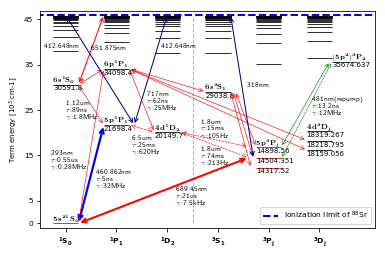

In [6]:
### Generates the level coordinates on the graph for higher Rydberg states. 
level_1s0 = gen_level_coordinates(7,30,3.268,1)
level_1p1 = gen_level_coordinates(7,30,2.729,2)
level_1d2 = gen_level_coordinates(6,30,2.38,3)
level_3s1 = gen_level_coordinates(7,30,3.371,4)
level_3pj = gen_level_coordinates(6,30,2.8,5)
level_3dj = gen_level_coordinates(6,30,2.6,6)
#plt.figure(figsize=(5,4))

# the ionozation line
plt.hlines(ionization_Sr88,0,10,linestyles='--',lw=2,color='blue',\
          label=r'Ionization limit of ${}^{88}$Sr') 

############################################################################
# seperating the singlet from the triplet states by a vertical line
plt.vlines(3.5,0,ionization_Sr88,linestyles='--',lw=1,color='black',alpha=0.3)
############################################################################

## plotting the generated Rydberg levels in one color
plot_levels(level_1s0,'black')
plot_levels(level_1p1,'black')
plot_levels(level_1d2,'black')
plot_levels(level_3s1,'black')
plot_levels(level_3pj,'black')
plot_levels(level_3dj,'black')

## replacing xtick numbers with names
plt.xticks([1,2,3,4,5,6],[r'$\bf{{}^{1}S_0}$',r'$\bf{{}^{1}P_1}$',r'$\bf{{}^{1}D_2}$',r'$\bf{{}^{3}S_1}$',\
                          r'$\bf{{}^{3}P_j}$',r'$\bf{{}^{3}D_j}$'],\
           color='black',fontsize=7.5,\
              fontname='sans-serif')



#### adjusting yticks values
ylabels_pos = [45000,35000,25000,15000,5000,0]
ylabels = [45,35,25,15,5,0]
plt.yticks(ylabels_pos,ylabels,fontsize=7.5,**kwargs)
plt.ylim(-1000,45932.1982+1000)
plt.xlim(0.5,7.1)
plt.legend(loc=4,fontsize=7.5)


#### custom commands for the low lying levels ; as defined in the above cell
custom=custom_levels()
#### adding the arrows for transitions
transitions()
#plt.show()


# save fig in file :
plt.savefig('20190731_88Sr_levels_and_transitions.png',bbox_inches='tight',dpi=1000)
plt.savefig('20190731_88Sr_levels_and_transitions.pdf',bbox_inches='tight')

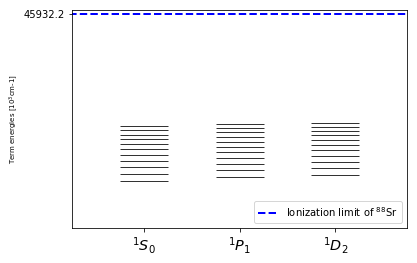

In [199]:
##  Other stuff

level_1s0 = gen_level_coordinates(49,60,3.268,1)
level_1p1 = gen_level_coordinates(49,60,2.729,2)
level_1d2 = gen_level_coordinates(49,60,2.38,3)
#level_3s1 = gen_level_coordinates(49,60,3.371,4)
#level_3pj = gen_level_coordinates(49,60,2.8,5)
#level_3dj = gen_level_coordinates(49,60,2.6,6)
plt.hlines(ionization_Sr88,0,10,linestyles='--',lw=2,color='blue',\
          label=r'Ionization limit of ${}^{88}$Sr') 
#plt.vlines(3.5,0,ionization_Sr88,linestyles='--',lw=1,color='black',alpha=0.3)
plot_levels(level_1s0,'black')
plot_levels(level_1p1,'black')
plot_levels(level_1d2,'black')
#plot_levels(level_3s1,'black')
#plot_levels(level_3pj,'black')
#plot_levels(level_3dj,'black')
plt.xticks([1,2,3,4,5,6],[r'${}^{1}S_0$',r'${}^{1}P_1$',r'${}^{1}D_2$',r'${}^{3}S_1$',r'${}^{3}P_j$',r'${}^{3}D_j$',],\
           color='black',fontsize='x-large',\
              fontname='Times New Roman')
ylabels = [ionization_Sr88,40000,35000,25000,15000,5000,0]
plt.yticks(ylabels,ylabels,**kwargs)
plt.ylim(45865,45932.1982+1)
plt.xlim(0.25,3.75)
plt.legend(loc=4)
plt.arrow(1,5000,1,10000,color='red',shape='full')